In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv(r"C:\Users\ayush\Downloads\Spam Email Detection - spam.csv")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [65]:
df.head()

,Category,Email
0,ham,"Go until jurong point, crazy.. Available only ..."


In [6]:
df.rename(columns={'v1': 'Category', 'v2': 'Email'}, inplace=True)

In [7]:
df['Category'].unique()

array(['ham', 'spam'], dtype=object)

In [8]:
df.isnull().sum()

Category    0
Email       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Email     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df.describe()

,Category,Email
count,5572,5572
unique,2,5163
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.head()

,Category,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.loc[df['Category']=='spam','Category',]==0
df.loc[df['Category']=='ham','Category',]==1

0       False
1       False
3       False
4       False
6       False
        ...  
5565    False
5568    False
5569    False
5570    False
5571    False
Name: Category, Length: 4516, dtype: bool

In [14]:
df['Category'].unique()

array(['ham', 'spam'], dtype=object)

In [15]:
X = df['Email']

y=df['Category']

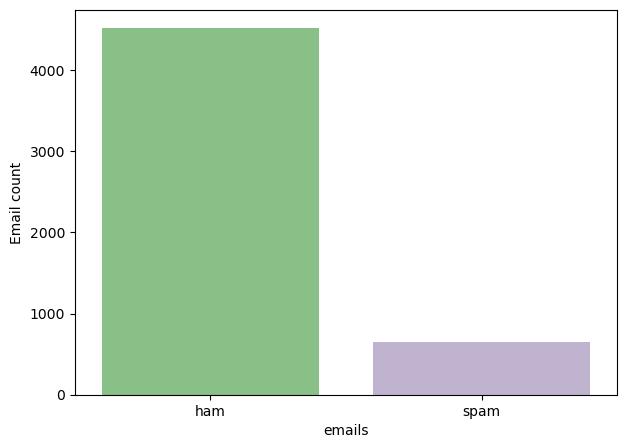

In [84]:
plt.figure(figsize = (7,5))

sns.countplot(x = 'Category',data=df, palette = 'Accent')
plt.xlabel('emails')
plt.ylabel('Email count')
plt.xticks(rotation=360)
plt.show()

In [16]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will �_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Email, Length: 5163, dtype: object


In [17]:
print(y)

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5163, dtype: object


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 3)

In [19]:

print(y_train.shape)
print(y_test.shape)

(3614,)
(1549,)


In [20]:
y_train.unique()

array(['ham', 'spam'], dtype=object)

In [32]:
feature_extraction = TfidfVectorizer(min_df = 1,stop_words ='english',lowercase= True)



In [49]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)



In [50]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [51]:
print(X_train_features)

  (0, 4667)	0.3165191606023958
  (0, 4366)	0.25185028035537815
  (0, 3855)	0.3205771312849595
  (0, 6564)	0.4472676293231876
  (0, 5210)	0.403684806416257
  (0, 1648)	0.3601019835093264
  (0, 6813)	0.4908504522301182
  (1, 5570)	0.42265372269931806
  (1, 887)	0.407631932352227
  (1, 4984)	0.267104269233964
  (1, 2513)	0.35026609327695307
  (1, 3412)	0.42265372269931806
  (1, 3693)	0.407631932352227
  (1, 2853)	0.21436239076231367
  (1, 6798)	0.26536355347814916
  (2, 6592)	0.4515718070500889
  (2, 2643)	0.5599022616551905
  (2, 3451)	0.34393255747209345
  (2, 4284)	0.603574979916849
  (3, 6418)	0.28204849337128907
  (3, 2064)	0.28204849337128907
  (3, 6792)	0.28204849337128907
  (3, 3548)	0.28204849337128907
  (3, 6659)	0.2404776250198939
  (3, 5386)	0.28204849337128907
  :	:
  (3610, 5048)	0.3905751084387332
  (3610, 4513)	0.31223914662977265
  (3610, 3001)	0.2727114922113081
  (3610, 6166)	0.23584236009998316
  (3610, 4252)	0.22464752712155867
  (3610, 1967)	0.1980536236760387
  (361

In [52]:
print(X_train)

996     Yetunde i'm in class can you not run water on ...
1840    Yeah. I got a list with only u and Joanna if I...
5417             Nope. I just forgot. Will show next week
2388    wiskey Brandy Rum Gin Beer Vodka Scotch Shampa...
3461    Bloomberg -Message center +447797706009 Why wa...
                              ...                        
807                     Boooo you always work. Just quit.
991     Hi im having the most relaxing time ever! we h...
1724              There bold 2  &lt;#&gt; . Is that yours
3522                                      Try neva mate!!
1746    I don know account details..i will ask my mom ...
Name: Email, Length: 3614, dtype: object


In [53]:
print(X_train_features)

  (0, 4667)	0.3165191606023958
  (0, 4366)	0.25185028035537815
  (0, 3855)	0.3205771312849595
  (0, 6564)	0.4472676293231876
  (0, 5210)	0.403684806416257
  (0, 1648)	0.3601019835093264
  (0, 6813)	0.4908504522301182
  (1, 5570)	0.42265372269931806
  (1, 887)	0.407631932352227
  (1, 4984)	0.267104269233964
  (1, 2513)	0.35026609327695307
  (1, 3412)	0.42265372269931806
  (1, 3693)	0.407631932352227
  (1, 2853)	0.21436239076231367
  (1, 6798)	0.26536355347814916
  (2, 6592)	0.4515718070500889
  (2, 2643)	0.5599022616551905
  (2, 3451)	0.34393255747209345
  (2, 4284)	0.603574979916849
  (3, 6418)	0.28204849337128907
  (3, 2064)	0.28204849337128907
  (3, 6792)	0.28204849337128907
  (3, 3548)	0.28204849337128907
  (3, 6659)	0.2404776250198939
  (3, 5386)	0.28204849337128907
  :	:
  (3610, 5048)	0.3905751084387332
  (3610, 4513)	0.31223914662977265
  (3610, 3001)	0.2727114922113081
  (3610, 6166)	0.23584236009998316
  (3610, 4252)	0.22464752712155867
  (3610, 1967)	0.1980536236760387
  (361

In [54]:
model = LogisticRegression()



In [55]:
model.fit(X_train_features,y_train)

LogisticRegression()

In [56]:
prediction_train =model.predict(X_train_features)

In [57]:
accuracy = accuracy_score(y_train,prediction_train)

In [58]:
print('Accuracy on training data :',accuracy)

Accuracy on training data : 0.9623685666851135


In [59]:
prediction_test =model.predict(X_test_features)

In [60]:
accuracy = accuracy_score(y_test,prediction_test)

In [61]:
print('Accuracy on test data :',accuracy)

Accuracy on test data : 0.9561007101355713


In [ ]:
# Enter the mail and check the email is spam or not

In [67]:
input_mail = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
input_data_features = feature_extraction.transform(input_mail)
prediction = model.predict(input_data_features)
print(prediction)

['spam']
